**DEUTSCH JOSZA ALGORITHM**

It enables us to find the property about a function, say f that for a n dimensional input is the output same for all otputs or is it balanced. The outpet set being guaranteed to be binary. Classical methods allow us to answer this question in exponential computations while the quantum computing can do this via this algo in constant time.

In [1]:
!pip install -q qiskit>=0.45.0
!pip install qiskit pylatexenc --quiet

In [2]:
!pip install qiskit_ibm_runtime

In [4]:
!pip install qiskit-aer

In [5]:
!pip install matplotlib

In [6]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
backend=FakeSherbrooke()

Here I am using a constant oracle for demo.

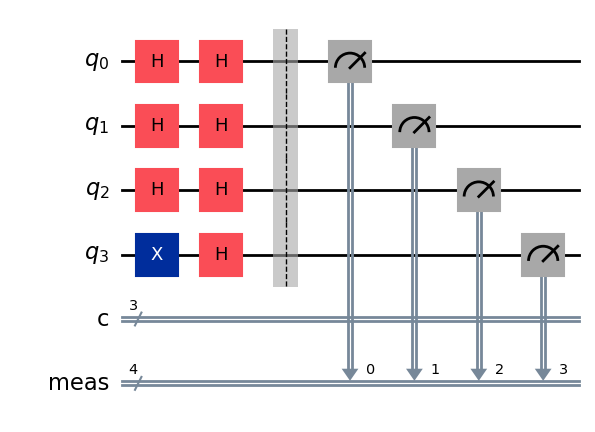

In [14]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
n=3                                       # number of qubits
qc=QuantumCircuit(n+1,n)
qc.x(n)
qc.h(n)                                  #seting up ancillary qubit as 1
qc.h(range(n))

#if using a balanced oracle
#for qubit in range(n):
    #qc.cx(qubit, n)
qc.h(range(n))
qc.measure_all(add_bits=True)
qc.draw('mpl')

In [15]:
from qiskit_aer import AerSimulator
from qiskit import transpile
sim = AerSimulator()
qc_transpiled = transpile(qc, sim)

# Step 3: Run the simulation
job = sim.run(qc_transpiled, shots=1024)
result = job.result()

# Step 4: Get classical counts
counts = result.get_counts()

# Step 5: Print the result
print("Classical Measurement Counts:")
for bitstring, count in counts.items():
    print(f"{bitstring}: {count}")

Classical Measurement Counts:
0000 000: 493
1000 000: 531


Here since we are using conmstant oracle we get a all 0 state on the first 3 qubits. Had we used a balanced oracle instead we would not have got any 000 count in the first three qubits since it would have been destroyed by destructive interference.